In [446]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_theme(palette='muted')

### Read Gapminder data into notebook

In [447]:
life = pd.read_excel('../data/gapminder_lifeexpectancy.xlsx', index_col=0)
pop = pd.read_excel('../data/gapminder_population.xlsx', index_col=0)
fert = pd.read_csv('../data/gapminder_total_fertility.csv', index_col=0)

### Time to check what the data looks like

In [448]:
life.head(2)

,1800.0,1801.0,1802.0,1803.0,1804.0,1805.0,1806.0,1807.0,1808.0,1809.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72


In [449]:
fert.head(2)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Total fertility rate,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47


In [450]:
pop.head(2)

,1800.0,1810.0,1820.0,1830.0,1840.0,1850.0,1860.0,1870.0,1880.0,1890.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
Total population,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,4710171.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0


I guess we need to fix the columns!

In [451]:
life.columns = life.columns.astype(int)
fert.columns = fert.columns.astype(int)
pop.columns = pop.columns.astype(int)

### Make DataFrames from wide to long

In [452]:
life.shape

(260, 217)

In [453]:
life.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

In [454]:
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [455]:
pop.columns

Int64Index([1800, 1810, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900,
            1910, 1920, 1930, 1940, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
            1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
            1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
            1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
            2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015],
           dtype='int64')

In [456]:
fert.index.name = 'country'
life.index.name = 'country'
pop.index.name = 'country'

In [457]:
fert.reset_index(inplace=True)
fert.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.7,6.46,6.2,5.93,5.66,5.4,5.14,4.9,4.68,4.47


In [458]:
fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')
fert

,country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
...,...,...,...
56155,Yugoslavia,2015,NaN
56156,Zambia,2015,5.59
56157,Zimbabwe,2015,3.35
56158,Åland,2015,NaN


In [459]:
life.reset_index(inplace=True)
life.head(2)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72


In [460]:
life = life.melt(id_vars='country', var_name='year', value_name='life_expectancy')
life

,country,year,life_expectancy
0,Abkhazia,1800,NaN
1,Afghanistan,1800,28.21
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,35.40
4,Algeria,1800,28.82
...,...,...,...
56415,Yugoslavia,2016,NaN
56416,Zambia,2016,57.10
56417,Zimbabwe,2016,61.69
56418,Åland,2016,NaN


In [461]:
pop.reset_index(inplace=True)
pop.head(2)

,country,1800,1810,1820,1830,1840,1850,1860,1870,1880,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,3280000.0,3280000.0,3323519.0,3448982.0,3625022.0,3810047.0,3973968.0,4169690.0,4419695.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0


In [462]:
pop = pop.melt(id_vars='country', var_name='year', value_name='total_population')
pop

,country,year,total_population
0,Abkhazia,1800,NaN
1,Afghanistan,1800,3280000.0
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,410445.0
4,Algeria,1800,2503218.0
...,...,...,...
22270,Northern Marianas,2015,NaN
22271,South Georgia and the South Sandwich Islands,2015,NaN
22272,US Minor Outlying Islands,2015,NaN
22273,Virgin Islands,2015,NaN


### Merge DataFrames

In [463]:
df = fert.merge(pop)
df = df.merge(life)
df.head()

,country,year,fertility_rate,total_population,life_expectancy
0,Abkhazia,1800,NaN,NaN,NaN
1,Afghanistan,1800,7.00,3280000.0,28.21
2,Akrotiri and Dhekelia,1800,NaN,NaN,NaN
3,Albania,1800,4.60,410445.0,35.40
4,Algeria,1800,6.99,2503218.0,28.82


Let's add the continents into the mix as well!

In [464]:
continents = pd.read_csv('../data/continents.csv', sep=';')

In [465]:
continents.head()

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [466]:
df = df.merge(continents)
df.head()

,country,year,fertility_rate,total_population,life_expectancy,continent
0,Afghanistan,1800,7.0,3280000.0,28.21,Asia
1,Afghanistan,1810,7.0,3280000.0,28.11,Asia
2,Afghanistan,1820,7.0,3323519.0,28.01,Asia
3,Afghanistan,1830,7.0,3448982.0,27.90,Asia
4,Afghanistan,1840,7.0,3625022.0,27.80,Asia


### Time to plot!

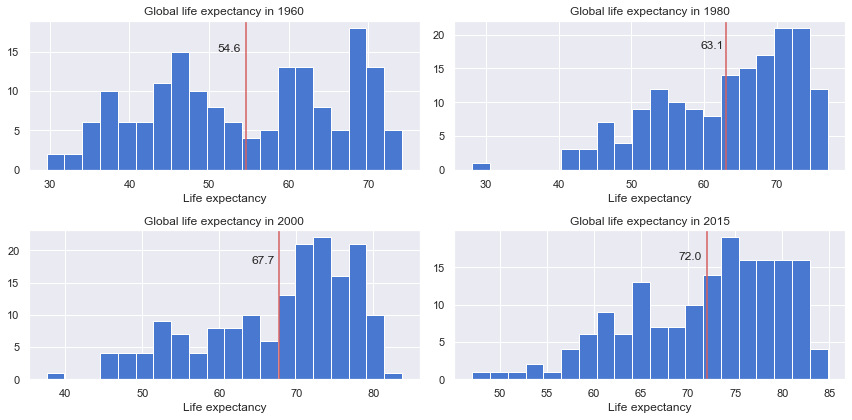

In [467]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
df1960 = df[df.year == 1960]
df1980 = df[df.year == 1980]
df2000 = df[df.year == 2000]
df2015 = df[df.year == 2015]
bins=20

ax0.hist(data=df1960, x='life_expectancy', bins=bins)
ax1.hist(data=df1980, x='life_expectancy', bins=bins)
ax2.hist(data=df2000, x='life_expectancy', bins=bins)
ax3.hist(data=df2015, x='life_expectancy', bins=bins)

ax0.set_xlabel('Life expectancy')
ax1.set_xlabel('Life expectancy')
ax2.set_xlabel('Life expectancy')
ax3.set_xlabel('Life expectancy')

mean1960 = df1960['life_expectancy'].mean()
mean1980 = df1980['life_expectancy'].mean()
mean2000 = df2000['life_expectancy'].mean()
mean2015 = df2015['life_expectancy'].mean()

ax0.axvline(mean1960, c='r')
ax1.axvline(mean1980, c='r')
ax2.axvline(mean2000, c='r')
ax3.axvline(mean2015, c='r')

ax0.text(mean1960-3.5, 15, round(mean1960, 1))
ax1.text(mean1980-3.5, 18, round(mean1980, 1))
ax2.text(mean2000-3.5, 18 , round(mean2000, 1))
ax3.text(mean2015-3, 16, round(mean2015, 1))


ax0.set_title('Global life expectancy in 1960')
ax1.set_title('Global life expectancy in 1980')
ax2.set_title('Global life expectancy in 2000')
ax3.set_title('Global life expectancy in 2015')

plt.tight_layout()

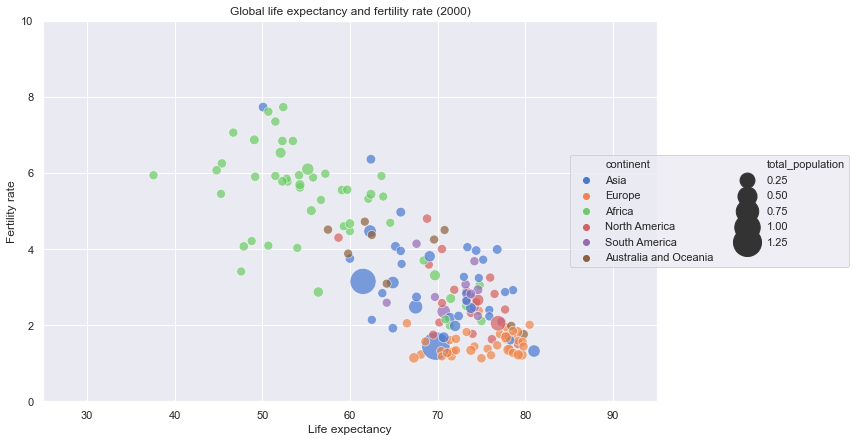

In [468]:
df_subset = df[df['year'] == 2000]
fig, ax = plt.subplots(figsize=(11, 7))
sns.scatterplot(ax= ax, x='life_expectancy', y='fertility_rate',
            data=df_subset, alpha=0.7, size='total_population', sizes=(80, 800),hue='continent')
plt.legend(loc= 'center left', bbox_to_anchor=(0.85,0.5), ncol=2)
plt.title('Global life expectancy and fertility rate (2000)')
ax.set_xlabel('Life expectancy')
ax.set_ylabel('Fertility rate')
plt.axis((25, 95, 0, 10));

In [502]:
for year in range(1960,2016):
    df_subset = df[df.year == year]
    fig, ax = plt.subplots(figsize=(11, 7))
    sns.scatterplot(ax= ax, x='life_expectancy', y='fertility_rate',
            data=df_subset, alpha=0.7, size='total_population', sizes=(80, 800),hue='continent', palette='muted')
    plt.legend(loc= 'center left', bbox_to_anchor=(0.9,0.5))
    plt.axis((25, 95, 0, 10))
    plt.title('Global life expectancy and fertility rate in ' + str(year))
    ax.set_xlabel('Life expectancy')
    ax.set_ylabel('Fertility rate')
    plt.savefig('../plots/lifeexp_' + str(year) + '.png')
    plt.close()

In [503]:
import imageio
images = []

for i in range(1960, 2016):
    filename = '../plots/lifeexp_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('lifeexp_allyears.gif', images, fps=5)

### BONUS! Climate data

In [469]:
climate = pd.read_csv('../data/gapminder_climatechange.csv', index_col=0)
co2 = pd.read_csv('../data/gapminder_co2.csv', index_col=0)
income = pd.read_csv('../data/gapminder_income_ppp.csv', index_col=0)

In [470]:
climate.head()

,2019,2020,2021
country,,,
Afghanistan,36.8,NaN,36.6
Albania,54.4,NaN,63.9
United Arab Emirates,26.3,NaN,28.0
Argentina,74.1,NaN,70.7
Armenia,37.1,NaN,39.1


In [471]:
co2.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.900,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400


In [472]:
income.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,683,683,683,683,683,683,683,683,683,683,...,2690,2750,2810,2870,2930,2990,3060,3120,3190,3260
Angola,700,702,705,709,711,714,718,721,725,727,...,8000,8170,8350,8530,8710,8900,9090,9280,9480,9690
Albania,755,755,755,755,755,756,756,756,756,756,...,25.1k,25.6k,26.2k,26.7k,27.3k,27.9k,28.5k,29.1k,29.7k,30.4k
Andorra,1360,1360,1360,1360,1370,1370,1370,1370,1380,1380,...,68.9k,70.4k,71.9k,73.4k,75k,76.6k,78.3k,80k,81.7k,83.4k
United Arab Emirates,1130,1130,1140,1140,1150,1150,1160,1160,1160,1170,...,101k,103k,105k,107k,110k,112k,114k,117k,119k,122k


In [473]:
climate.columns = climate.columns.astype(int)
income.columns = income.columns.astype(int)

**Unfortunately, there's no 2019 data for CO2 but it's the earliest data for climate change danger consideration! I guess, we have to create it then using the mean of the prior 3 years**

In [474]:
co2['2019'] = round(co2[['2016', '2017', '2018']].mean(axis=1), 3)
co2.columns = co2.columns.astype(int)
co2.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254,0.249
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120,1.147
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590,1.590
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120,6.153
United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400,21.400


**This is looking good, time to melt the DataFrames**

In [475]:
climate.reset_index(inplace=True)
co2.reset_index(inplace=True)
income.reset_index(inplace=True)

In [476]:
climate = climate.melt(id_vars='country', var_name = 'year', value_name= 'climate_change_danger_%')
climate.head(2)

,country,year,climate_change_danger_%
0,Afghanistan,2019,36.8
1,Albania,2019,54.4


In [477]:
co2 = co2.melt(id_vars='country', var_name = 'year', value_name= 'CO2_emissions')
co2.head(2)

,country,year,CO2_emissions
0,Afghanistan,1800,NaN
1,Angola,1800,NaN


In [478]:
income = income.melt(id_vars='country', var_name = 'year', value_name= 'income')
income.head(2)

,country,year,income
0,Afghanistan,1800,683
1,Angola,1800,700


**And now we merge them. As we only need 2019 data, we'll create new temporary dfs first**

In [479]:
climate_2019 = climate[climate['year'] == 2019]
co2_2019 = co2[co2['year'] == 2019]
income_2019 = income[income['year'] == 2019]


climate_2019.head()

,country,year,climate_change_danger_%
0,Afghanistan,2019,36.8
1,Albania,2019,54.4
2,United Arab Emirates,2019,26.3
3,Argentina,2019,74.1
4,Armenia,2019,37.1


In [480]:
df1 = climate_2019.merge(co2_2019)
df1 = df1.merge(income_2019)
df1.head()

,country,year,climate_change_danger_%,CO2_emissions,income
0,Afghanistan,2019,36.8,0.249,2070
1,Albania,2019,54.4,1.59,13.7k
2,United Arab Emirates,2019,26.3,21.4,68.3k
3,Argentina,2019,74.1,4.52,22.1k
4,Armenia,2019,37.1,1.783,13.7k


**The Dtypes are not working for plotting, we have to work some magic to get it in order**

In [481]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 142
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  143 non-null    object 
 1   year                     143 non-null    object 
 2   climate_change_danger_%  141 non-null    float64
 3   CO2_emissions            143 non-null    object 
 4   income                   143 non-null    object 
dtypes: float64(1), object(4)
memory usage: 6.7+ KB


In [482]:
#Very interesting that I had to find a different solution for each column!
df1.year = df1.year.astype(int)
df1.CO2_emissions = df1.CO2_emissions.astype(float)
df1.income = df1.income.map(lambda x: x.rstrip('k'))

After stripping the 'k' from the income column, we have to multiply it to get proper values

In [483]:
df1.head()

,country,year,climate_change_danger_%,CO2_emissions,income
0,Afghanistan,2019,36.8,0.249,2070
1,Albania,2019,54.4,1.590,13.7
2,United Arab Emirates,2019,26.3,21.400,68.3
3,Argentina,2019,74.1,4.520,22.1
4,Armenia,2019,37.1,1.783,13.7


In [484]:
df1.income = df1.income.astype(float)

In [486]:
df1.income = df1.income.where(df1.income >= 1000, df1.income*1000)
df1.head()

,country,year,climate_change_danger_%,CO2_emissions,income
0,Afghanistan,2019,36.8,0.249,2070.0
1,Albania,2019,54.4,1.590,13700.0
2,United Arab Emirates,2019,26.3,21.400,68300.0
3,Argentina,2019,74.1,4.520,22100.0
4,Armenia,2019,37.1,1.783,13700.0


In [487]:
#Luxembourg is crazy
df1[df1.income == df1.income.max()]

,country,year,climate_change_danger_%,CO2_emissions,income
77,Luxembourg,2019,53.0,15.733,117000.0


In [488]:
df1[df1.income == df1.income.min()]

,country,year,climate_change_danger_%,CO2_emissions,income
95,Niger,2019,36.8,0.101,1220.0


**Time to create some bins for the incomes so we can better analyse them**

In [489]:
bins = [1000, 10000, 25000, 50000, 75000, 100000]
labels = ['1000-10000', '10001-25000', '25001-50000', '50001-100000','>100000']
df1['income_bins'] = pd.cut(df1.income, bins=bins, labels=labels)
df1.head()

,country,year,climate_change_danger_%,CO2_emissions,income,income_bins
0,Afghanistan,2019,36.8,0.249,2070.0,1000-10000
1,Albania,2019,54.4,1.590,13700.0,10001-25000
2,United Arab Emirates,2019,26.3,21.400,68300.0,50001-100000
3,Argentina,2019,74.1,4.520,22100.0,10001-25000
4,Armenia,2019,37.1,1.783,13700.0,10001-25000


Let's get the continents in there again

In [490]:
df1 = df1.merge(continents)
df1.head()

,country,year,climate_change_danger_%,CO2_emissions,income,income_bins,continent
0,Afghanistan,2019,36.8,0.249,2070.0,1000-10000,Asia
1,Albania,2019,54.4,1.590,13700.0,10001-25000,Europe
2,United Arab Emirates,2019,26.3,21.400,68300.0,50001-100000,Asia
3,Argentina,2019,74.1,4.520,22100.0,10001-25000,South America
4,Armenia,2019,37.1,1.783,13700.0,10001-25000,Europe


**Time to plot a nice scatter plot. Are there correlations?**

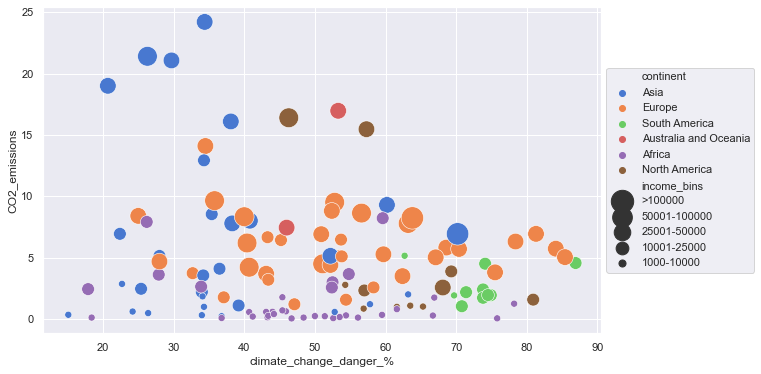

In [496]:
income_order = ['>100000', '50001-100000', '25001-50000', '10001-25000', '1000-10000']
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df1, x = 'climate_change_danger_%', y = 'CO2_emissions', 
                size='income_bins', size_order=income_order, sizes=(50, 500), hue='continent')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [499]:
df1.corr()

,year,climate_change_danger_%,CO2_emissions,income
year,NaN,NaN,NaN,NaN
climate_change_danger_%,NaN,1.000000,-0.169324,0.101716
CO2_emissions,NaN,-0.169324,1.000000,0.696408
income,NaN,0.101716,0.696408,1.000000


**Interesting, who might the four rich Asian countries be? ;)**

In [497]:
df1.sort_values(by='CO2_emissions', ascending=False)

,country,year,climate_change_danger_%,CO2_emissions,income,income_bins,continent
63,Kuwait,2019,34.4,24.200,49900.0,25001-50000,Asia
2,United Arab Emirates,2019,26.3,21.400,68300.0,50001-100000,Asia
12,Bahrain,2019,29.7,21.067,45300.0,25001-50000,Asia
102,Saudi Arabia,2019,20.7,19.000,47000.0,25001-50000,Asia
5,Australia,2019,53.3,16.967,49300.0,25001-50000,Australia and Oceania
...,...,...,...,...,...,...,...
105,Sierra Leone,2019,48.4,0.136,1710.0,1000-10000,Africa
86,Niger,2019,36.8,0.101,1220.0,1000-10000,Africa
101,Rwanda,2019,52.6,0.091,2230.0,1000-10000,Africa
83,Malawi,2019,75.8,0.075,1540.0,1000-10000,Africa
